# Body-Pose Estimation with SVM

**Name:** Eric McKevitt  
**Course:** Human-Centered Robotics (CSCI 473)  
**Due:** May 3, 2023

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import seaborn as sns
from sklearn.model_selection import ParameterGrid

# RAD Featurization

### Load data and create simple SVC with default parameters

In [3]:
actions = {
    8: "CheerUp",
    10: "TossPaper",
    12: "LieOnSofa",
    13: "Walk",
    15: "StandUp",
    16: "SitDown"
}

# Load the training data
train_filename = "./Outputs/Training/rad_d1_train.txt"
with open(train_filename, "r") as f:
    train_data = f.readlines()
for i, line in enumerate(train_data):
    train_data[i] = [float(x) for x in line.split(" ")]
train_df = pd.DataFrame(train_data)
train_targets = train_df[train_df.columns[-1]].astype(int)
train_features = train_df.drop(train_df.columns[-1], axis=1)

# Load the testing data
test_filename = "./Outputs/Testing/rad_d1_test.txt"
with open(test_filename, "r") as f:
    test_data = f.readlines()
for i, line in enumerate(test_data):
    test_data[i] = [float(x) for x in line.split(" ")]
test_df = pd.DataFrame(test_data)
test_targets = test_df[test_df.columns[-1]].astype(int)
test_features = test_df.drop(test_df.columns[-1], axis=1)

# # Initialize an SVC with default parameters
clf = SVC()

# Fit the model to the training data
clf.fit(train_features, train_targets)

# Use the model to make predictions on the testing data
test_pred = clf.predict(test_features)

# Calculate the accuracy of the model
acc = accuracy_score(test_targets, test_pred)
print(f"Default Param Accuracy: {acc}")

# Calculate the precision of the model
prec = precision_score(test_targets, test_pred, average='weighted')
print(f"Default Param Precision: {prec}")


Default Param Accuracy: 0.625
Default Param Precision: 0.6300024050024049


In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.052632,0.058480,0.023392,0.093567,0.087719,0.169591,0.187135,0.315789,0.011696,0.081871,...,0.046784,0.005848,0.011696,0.023392,0.005848,0.064327,0.105263,0.076023,0.116959,12.0
1,0.022556,0.187970,0.127820,0.097744,0.060150,0.090226,0.127820,0.037594,0.248120,0.045113,...,0.338346,0.120301,0.052632,0.022556,0.007519,0.015038,0.015038,0.248120,0.045113,16.0
2,0.074074,0.027778,0.018519,0.027778,0.138889,0.148148,0.120370,0.296296,0.148148,0.055556,...,0.037037,0.037037,0.064815,0.222222,0.009259,0.009259,0.018519,0.240741,0.287037,15.0
3,0.007353,0.044118,0.077206,0.294118,0.187500,0.227941,0.062500,0.058824,0.040441,0.047794,...,0.147059,0.169118,0.018382,0.062500,0.187500,0.187500,0.025735,0.044118,0.051471,13.0
4,0.164557,0.151899,0.075949,0.050633,0.240506,0.265823,0.018987,0.018987,0.012658,0.044304,...,0.012658,0.018987,0.012658,0.018987,0.031646,0.291139,0.341772,0.132911,0.056962,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.046296,0.277778,0.296296,0.027778,0.018519,0.009259,0.018519,0.027778,0.277778,0.250000,...,0.138889,0.185185,0.157407,0.074074,0.037037,0.018519,0.009259,0.111111,0.148148,8.0
68,0.006993,0.006993,0.000000,0.027972,0.062937,0.202797,0.342657,0.083916,0.265734,0.027972,...,0.300699,0.041958,0.006993,0.000000,0.000000,0.041958,0.041958,0.146853,0.265734,12.0
69,0.047486,0.055866,0.162011,0.265363,0.136872,0.097765,0.097765,0.083799,0.053073,0.022346,...,0.002793,0.016760,0.212291,0.134078,0.145251,0.108939,0.128492,0.128492,0.114525,13.0
70,0.010638,0.000000,0.000000,0.000000,0.478723,0.244681,0.212766,0.021277,0.031915,0.042553,...,0.063830,0.138298,0.106383,0.010638,0.010638,0.031915,0.010638,0.117021,0.351064,10.0


In [18]:
train_targets

0     12
1     16
2     15
3     13
4     10
      ..
67     8
68    12
69    13
70    10
71    16
Name: 171, Length: 72, dtype: int64

### Confusion Matrix for Initial Configuration

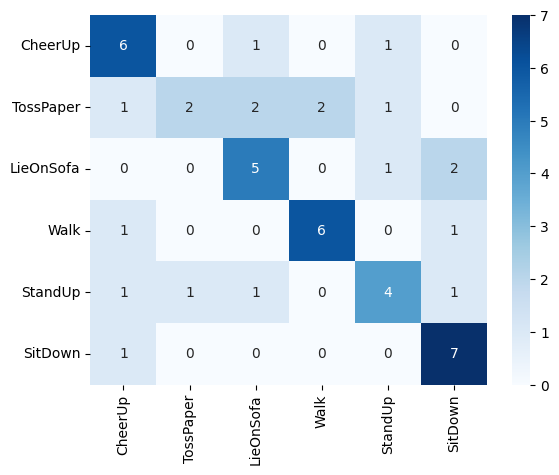

In [5]:
# # Create a confusion matrix
cm = confusion_matrix(test_targets, test_pred)

# Set the axis labels of the confusion matrix using the actions dictionary
action_labels = [actions[i] for i in sorted(actions.keys())]
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels);

### Evaluate 3 sets of parameters using accuracy, precision, and confusion matrix (RAD)

Model 1: acc: 0.5	prec: 0.5744825708061002
confusion matrix: 
[[4 0 0 0 0 4]
 [1 2 2 2 0 1]
 [0 0 5 0 1 2]
 [1 0 0 6 0 1]
 [0 1 1 0 2 4]
 [3 0 0 0 0 5]]

Model 2: acc: 0.5833333333333334	prec: 0.6291666666666665
confusion matrix: 
[[6 0 1 0 1 0]
 [2 3 1 1 1 0]
 [0 0 5 0 1 2]
 [1 0 0 6 0 1]
 [2 1 1 0 4 0]
 [4 0 0 0 0 4]]

Model 3: acc: 0.6041666666666666	prec: 0.6410765160765161
confusion matrix: 
[[6 0 1 0 1 0]
 [1 3 1 1 1 1]
 [0 0 6 0 1 1]
 [1 1 0 6 0 0]
 [3 0 1 0 4 0]
 [2 0 0 0 2 4]]


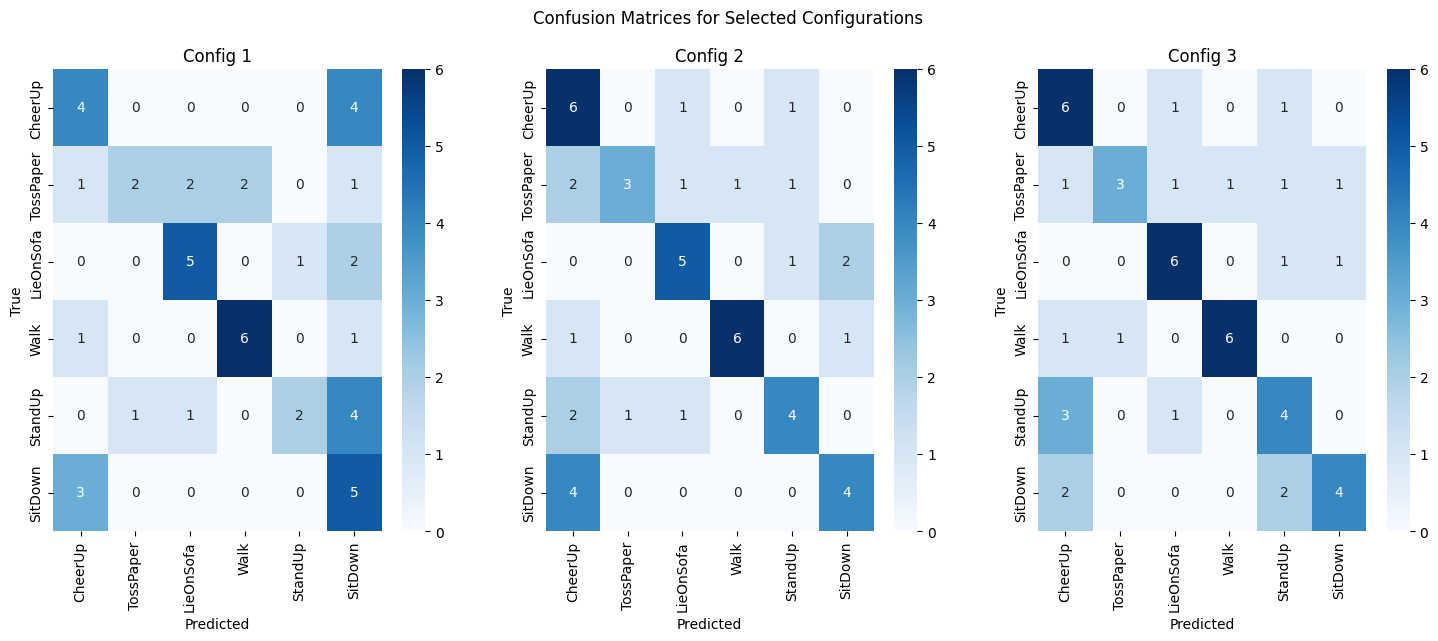

,C,gamma,kernel,accuracy,precision
0,0.1,0.001,sigmoid,0.500000,0.574483
1,1.0,0.010,linear,0.583333,0.629167
2,10.0,0.100,rbf,0.604167,0.641077


In [6]:
# Selected configurations
configurations = [
    {"C": 0.1, "gamma": 0.001, "kernel": "sigmoid"},
    {"C": 1, "gamma": 0.01, "kernel": "linear"},
    {"C": 10, "gamma": 0.1, "kernel": "rbf"},
]

# Initialize lists to store the results
accuracy_list = []
precision_list = []
confusion_matrices = []

# Loop through the configurations, train the models, and get their performance metrics
for config in configurations:
    clf = SVC(**config)
    clf.fit(train_features, train_targets)
    pred = clf.predict(test_features)
    accuracy = accuracy_score(test_targets, pred)
    precision = precision_score(test_targets, pred, average='weighted')
    cm = confusion_matrix(test_targets, pred)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    confusion_matrices.append(cm)

# Create a list with the configuration values
config_values = [(config["C"], config["gamma"], config["kernel"]) for config in configurations]

# Create the DataFrame with the configuration values
results_df = pd.DataFrame(
    {
        "C": [config[0] for config in config_values],
        "gamma": [config[1] for config in config_values],
        "kernel": [config[2] for config in config_values],
        "accuracy": accuracy_list,
        "precision": precision_list
    }
)

print(f"Model 1: acc: {accuracy_list[0]}\tprec: {precision_list[0]}\nconfusion matrix: \n{confusion_matrices[0]}\n")
print(f"Model 2: acc: {accuracy_list[1]}\tprec: {precision_list[1]}\nconfusion matrix: \n{confusion_matrices[1]}\n")
print(f"Model 3: acc: {accuracy_list[2]}\tprec: {precision_list[2]}\nconfusion matrix: \n{confusion_matrices[2]}")

# Create a subplot with three side-by-side confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Confusion Matrices for Selected Configurations")

sns.heatmap(confusion_matrices[0], annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels, ax=ax1)
ax1.set_title("Config 1")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("True")

sns.heatmap(confusion_matrices[1], annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels, ax=ax2)
ax2.set_title("Config 2")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("True")

sns.heatmap(confusion_matrices[2], annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels, ax=ax3)
ax3.set_title("Config 3")
ax3.set_xlabel("Predicted")
ax3.set_ylabel("True")

plt.show()

results_df

### Hyperparameter Tuning

Best hyperparameters:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy: 0.625


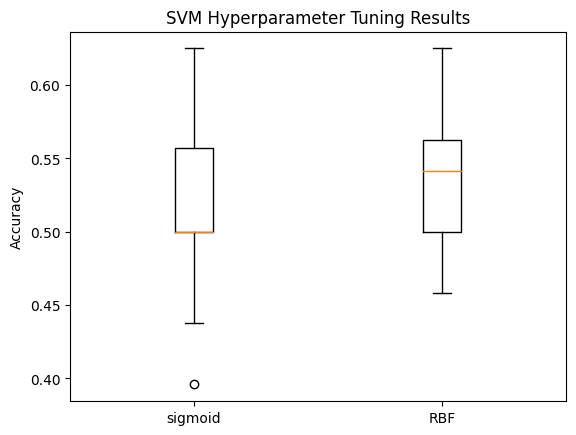

In [7]:
# Define the hyperparameter grid
param_grid = {
    "kernel": ["sigmoid", "rbf"],
    "C": [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
}

# Initialize variables to keep track of the best hyperparameters and accuracy
best_acc = 0
best_params = {}

# Perform grid search over hyperparameters
results = []
for params in ParameterGrid(param_grid):
    clf = SVC(**params)
    clf.fit(train_features, train_targets)
    test_pred = clf.predict(test_features)
    acc = accuracy_score(test_targets, test_pred)
    results.append({"params": params, "accuracy": acc})
    if acc > best_acc:
        best_acc = acc
        best_params = params

print("Best hyperparameters:")
print(best_params)
print(f"Best accuracy: {best_acc}")

# Create a plot of the results
sigmoid_results = [r["accuracy"] for r in results if r["params"]["kernel"] == "sigmoid"]
rbf_results = [r["accuracy"] for r in results if r["params"]["kernel"] == "rbf"]

fig, ax = plt.subplots()
ax.boxplot([sigmoid_results, rbf_results])
ax.set_xticklabels(["sigmoid", "RBF"])
ax.set_ylabel("Accuracy")
ax.set_title("SVM Hyperparameter Tuning Results")
plt.show()

### Visualize Hyperparameter Tuning Results

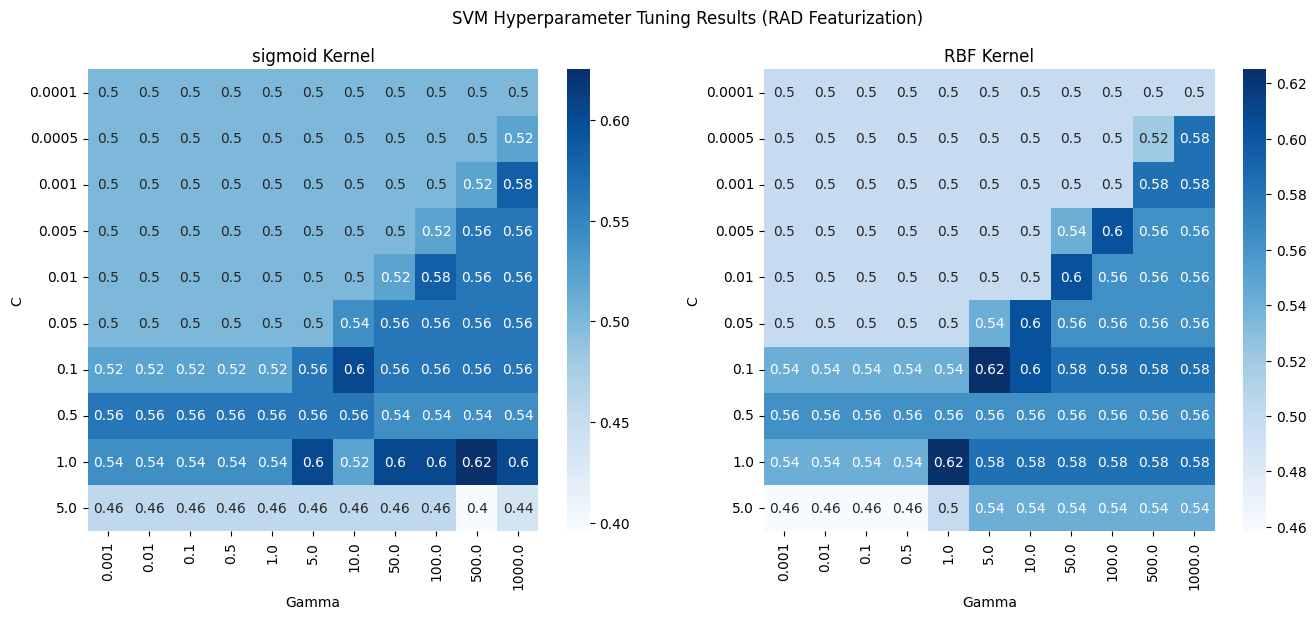

In [8]:
# Create a nested dictionary to store accuracies for each kernel type and the corresponding C and gamma values
accuracy_dict = {
    "sigmoid": {c: {gamma: 0 for gamma in param_grid["gamma"]} for c in param_grid["C"]},
    "rbf": {c: {gamma: 0 for gamma in param_grid["gamma"]} for c in param_grid["C"]}
}

# Fill the dictionary with the results from your grid search
for result in results:
    kernel = result["params"]["kernel"]
    c = result["params"]["C"]
    gamma = result["params"]["gamma"]
    accuracy = result["accuracy"]
    accuracy_dict[kernel][c][gamma] = accuracy

# Create heatmaps for both kernel types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("SVM Hyperparameter Tuning Results (RAD Featurization)")

# sigmoid kernel heatmap
sigmoid_accuracies = pd.DataFrame(accuracy_dict["sigmoid"])
sns.heatmap(sigmoid_accuracies, annot=True, cmap="Blues", ax=ax1)
ax1.set_title("sigmoid Kernel")
ax1.set_xlabel("Gamma")
ax1.set_ylabel("C")

# RBF kernel heatmap
rbf_accuracies = pd.DataFrame(accuracy_dict["rbf"])
sns.heatmap(rbf_accuracies, annot=True, cmap="Blues", ax=ax2)
ax2.set_title("RBF Kernel")
ax2.set_xlabel("Gamma")
ax2.set_ylabel("C")

plt.show()

### Evaluate the best model found with RAD featurization

In [9]:
print("Best Parameters:", best_params)
best_clf = SVC(**best_params)
best_clf.fit(train_features, train_targets)
best_test_pred = best_clf.predict(test_features)
best_acc = accuracy_score(test_targets, best_test_pred)
print(f"\nBest accuracy: {best_acc}")

precision = precision_score(test_targets, best_test_pred, average='weighted')  # 'weighted' calculates the average precision and takes class imbalance into account
print(f"Precision: {precision}")

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Best accuracy: 0.625
Precision: 0.6300024050024049


### Confusion Matrix for Best Configuration

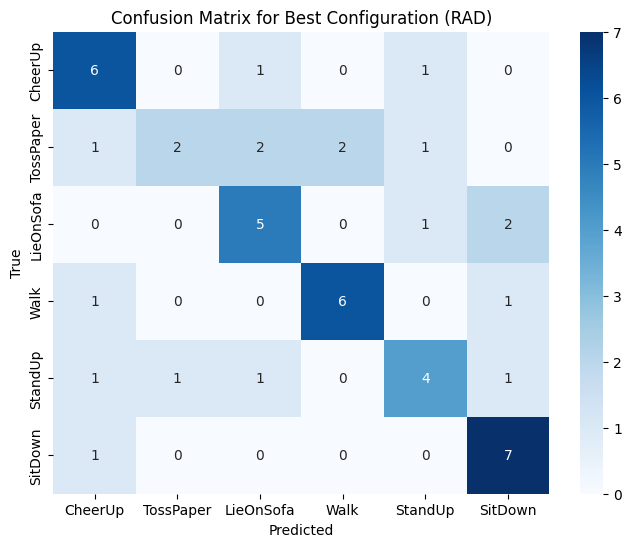

In [10]:
best_cm = confusion_matrix(test_targets, best_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Configuration (RAD)')
plt.show()

# Custom Featurization

### Load data and create simple SVC with default parameters

In [11]:
# Load the training data
train_filename = "./Outputs/Training/cust_d1_train.txt"
with open(train_filename, "r") as f:
    train_data = f.readlines()
for i, line in enumerate(train_data):
    train_data[i] = [float(x) for x in line.split(" ")]
train_df = pd.DataFrame(train_data)
train_targets = train_df[train_df.columns[-1]].astype(int)
train_features = train_df.drop(train_df.columns[-1], axis=1)

# Load the testing data
test_filename = "./Outputs/Testing/cust_d1_test.txt"
with open(test_filename, "r") as f:
    test_data = f.readlines()
for i, line in enumerate(test_data):
    test_data[i] = [float(x) for x in line.split(" ")]
test_df = pd.DataFrame(test_data)
test_targets = test_df[test_df.columns[-1]].astype(int)
test_features = test_df.drop(test_df.columns[-1], axis=1)

# Initialize an SVC with default parameters
clf = SVC()

# Fit the model to the training data
clf.fit(train_features, train_targets)

# Use the model to make predictions on the testing data
test_pred = clf.predict(test_features)

# Calculate the accuracy of the model
acc = accuracy_score(test_targets, test_pred)
print(f"Default Param Accuracy: {acc}")

# Calculate the precision of the model
prec = precision_score(test_targets, test_pred, average='weighted')
print(f"Default Param Precision: {prec}")


Default Param Accuracy: 0.6875
Default Param Precision: 0.717027417027417


### Confusion Matrix for Initial Configuration

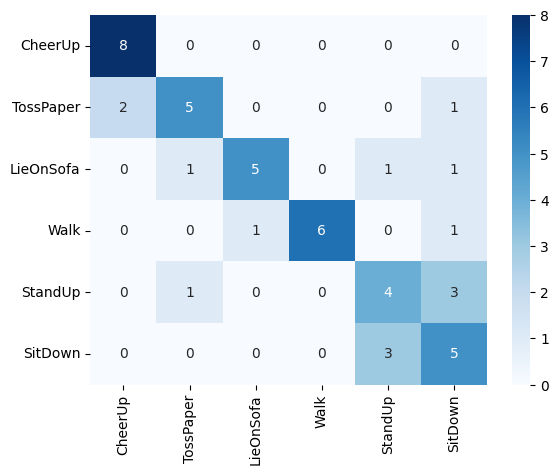

In [12]:
# Create a confusion matrix
cm = confusion_matrix(test_targets, test_pred)

# Set the axis labels of the confusion matrix using the actions dictionary
action_labels = [actions[i] for i in sorted(actions.keys())]
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels);

### Evaluate 3 sets of parameters using accuracy, precision, and confusion matrix (Custom)

Model 1: acc: 0.5625	prec: 0.5688492063492063
confusion matrix: 
[[7 0 0 1 0 0]
 [1 1 3 3 0 0]
 [0 0 4 3 0 1]
 [0 0 0 7 0 1]
 [0 1 0 1 3 3]
 [0 0 0 0 3 5]]

Model 2: acc: 0.5625	prec: 0.5805194805194805
confusion matrix: 
[[7 0 0 0 0 1]
 [2 2 3 0 1 0]
 [0 1 3 0 2 2]
 [1 0 1 5 0 1]
 [0 2 0 0 5 1]
 [0 0 0 0 3 5]]

Model 3: acc: 0.5625	prec: 0.5831649831649831
confusion matrix: 
[[7 0 0 0 0 1]
 [2 4 2 0 0 0]
 [0 2 2 0 2 2]
 [1 0 1 5 0 1]
 [0 2 0 0 4 2]
 [0 0 0 0 3 5]]


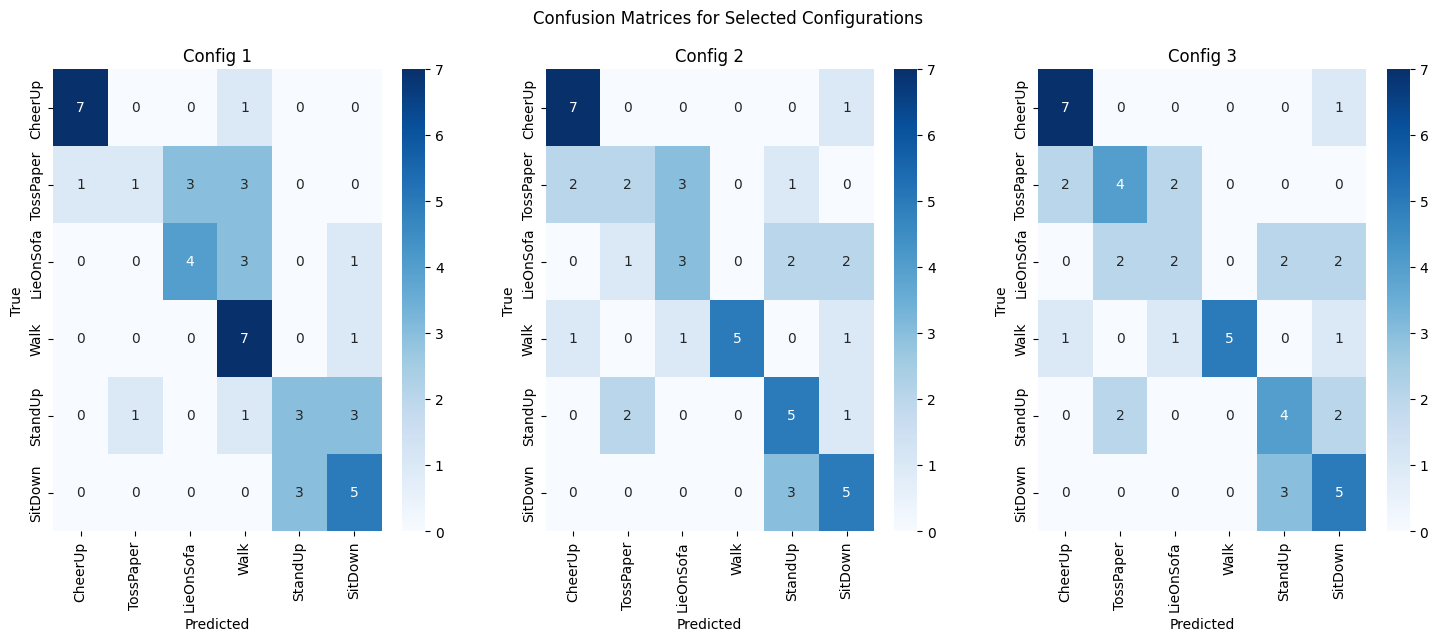

,C,gamma,kernel,accuracy,precision
0,0.1,0.001,sigmoid,0.5625,0.568849
1,1.0,0.010,linear,0.5625,0.580519
2,10.0,0.100,rbf,0.5625,0.583165


In [13]:
# Selected configurations
configurations = [
    {"C": 0.1, "gamma": 0.001, "kernel": "sigmoid"},
    {"C": 1, "gamma": 0.01, "kernel": "linear"},
    {"C": 10, "gamma": 0.1, "kernel": "rbf"},
]

# Initialize lists to store the results
accuracy_list = []
precision_list = []
confusion_matrices = []

# Loop through the configurations, train the models, and get their performance metrics
for config in configurations:
    clf = SVC(**config)
    clf.fit(train_features, train_targets)
    pred = clf.predict(test_features)
    accuracy = accuracy_score(test_targets, pred)
    precision = precision_score(test_targets, pred, average='weighted')
    cm = confusion_matrix(test_targets, pred)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    confusion_matrices.append(cm)

# Create a list with the configuration values
config_values = [(config["C"], config["gamma"], config["kernel"]) for config in configurations]

# Create the DataFrame with the configuration values
results_df = pd.DataFrame(
    {
        "C": [config[0] for config in config_values],
        "gamma": [config[1] for config in config_values],
        "kernel": [config[2] for config in config_values],
        "accuracy": accuracy_list,
        "precision": precision_list
    }
)


print(f"Model 1: acc: {accuracy_list[0]}\tprec: {precision_list[0]}\nconfusion matrix: \n{confusion_matrices[0]}\n")
print(f"Model 2: acc: {accuracy_list[1]}\tprec: {precision_list[1]}\nconfusion matrix: \n{confusion_matrices[1]}\n")
print(f"Model 3: acc: {accuracy_list[2]}\tprec: {precision_list[2]}\nconfusion matrix: \n{confusion_matrices[2]}")

# Create a subplot with three side-by-side confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Confusion Matrices for Selected Configurations")

sns.heatmap(confusion_matrices[0], annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels, ax=ax1)
ax1.set_title("Config 1")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("True")

sns.heatmap(confusion_matrices[1], annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels, ax=ax2)
ax2.set_title("Config 2")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("True")

sns.heatmap(confusion_matrices[2], annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels, ax=ax3)
ax3.set_title("Config 3")
ax3.set_xlabel("Predicted")
ax3.set_ylabel("True")

plt.show()

results_df

### Hyperparameter Tuning

Best hyperparameters:
{'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
Best accuracy: 0.7083333333333334
Precision: 0.6300024050024049


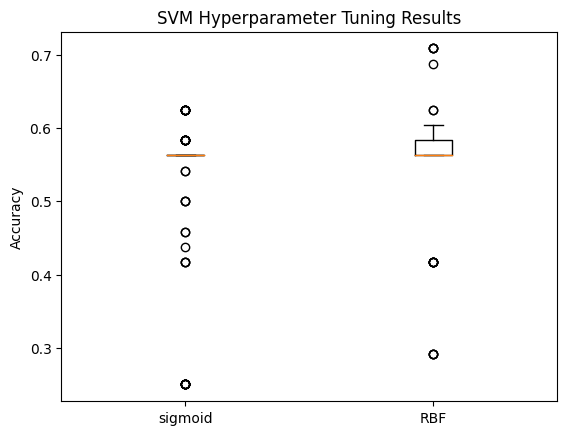

In [14]:
# Define the hyperparameter grid
param_grid = {
    "kernel": ["sigmoid", "rbf"],
    "C": [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]
}


# Initialize variables to keep track of the best hyperparameters and accuracy
best_acc = 0
best_params = {}

# Perform grid search over hyperparameters
results = []
for params in ParameterGrid(param_grid):
    clf = SVC(**params)
    clf.fit(train_features, train_targets)
    test_pred = clf.predict(test_features)
    acc = accuracy_score(test_targets, test_pred)
    results.append({"params": params, "accuracy": acc})
    if acc > best_acc:
        best_acc = acc
        best_params = params

print("Best hyperparameters:")
print(best_params)
print(f"Best accuracy: {best_acc}")

precision = precision_score(test_targets, best_test_pred, average='weighted')  # 'weighted' calculates the average precision and takes class imbalance into account
print(f"Precision: {precision}")

# Create a plot of the results
sigmoid_results = [r["accuracy"] for r in results if r["params"]["kernel"] == "sigmoid"]
rbf_results = [r["accuracy"] for r in results if r["params"]["kernel"] == "rbf"]

fig, ax = plt.subplots()
ax.boxplot([sigmoid_results, rbf_results])
ax.set_xticklabels(["sigmoid", "RBF"])
ax.set_ylabel("Accuracy")
ax.set_title("SVM Hyperparameter Tuning Results")
plt.show()

### Visualize Hyperparameter Tuning Results

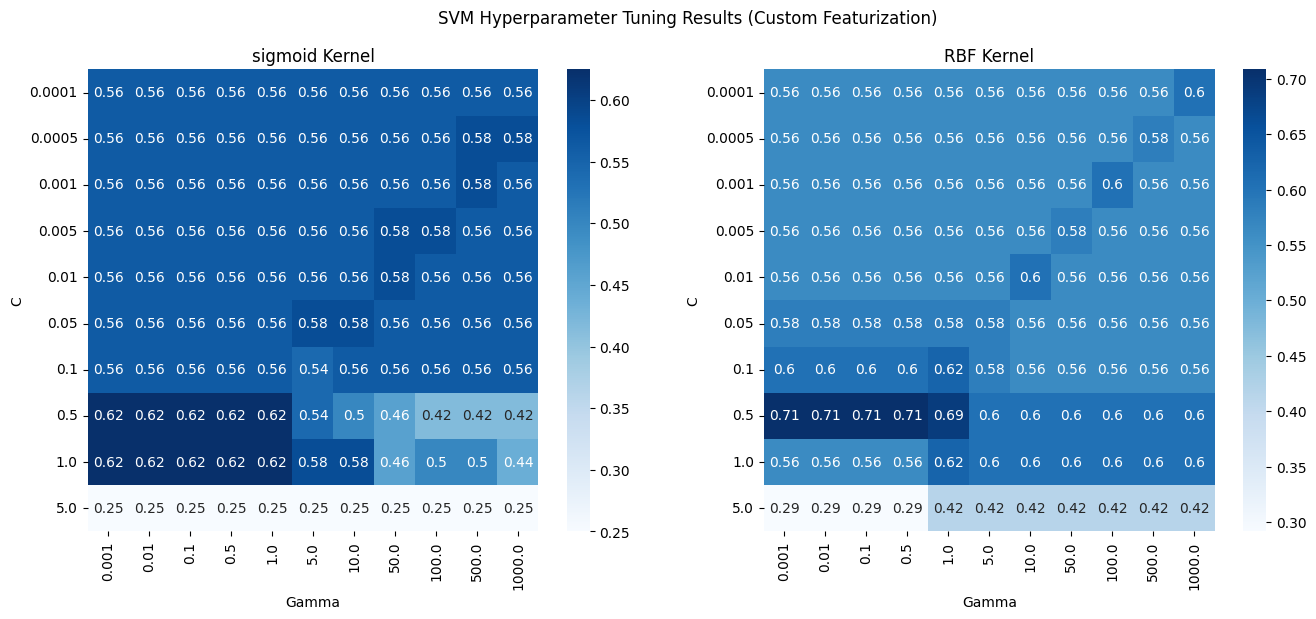

In [15]:
# Create a nested dictionary to store accuracies for each kernel type and the corresponding C and gamma values
accuracy_dict = {
    "sigmoid": {c: {gamma: 0 for gamma in param_grid["gamma"]} for c in param_grid["C"]},
    "rbf": {c: {gamma: 0 for gamma in param_grid["gamma"]} for c in param_grid["C"]}
}

# Fill the dictionary with the results from your grid search
for result in results:
    kernel = result["params"]["kernel"]
    c = result["params"]["C"]
    gamma = result["params"]["gamma"]
    accuracy = result["accuracy"]
    accuracy_dict[kernel][c][gamma] = accuracy

# Create heatmaps for both kernel types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("SVM Hyperparameter Tuning Results (Custom Featurization)")

# sigmoid kernel heatmap
sigmoid_accuracies = pd.DataFrame(accuracy_dict["sigmoid"])
sns.heatmap(sigmoid_accuracies, annot=True, cmap="Blues", ax=ax1)
ax1.set_title("sigmoid Kernel")
ax1.set_xlabel("Gamma")
ax1.set_ylabel("C")

# RBF kernel heatmap
rbf_accuracies = pd.DataFrame(accuracy_dict["rbf"])
sns.heatmap(rbf_accuracies, annot=True, cmap="Blues", ax=ax2)
ax2.set_title("RBF Kernel")
ax2.set_xlabel("Gamma")
ax2.set_ylabel("C")

plt.show()

### Evaluate the best model found with custom featurization

In [16]:
print(best_params)
best_clf = SVC(**best_params)
best_clf.fit(train_features, train_targets)
best_test_pred = best_clf.predict(test_features)
best_acc = accuracy_score(test_targets, best_test_pred)
print(f"Best accuracy: {best_acc}")

precision = precision_score(test_targets, best_test_pred, average='weighted')  # 'weighted' calculates the average precision and takes class imbalance into account
print(f"Precision: {precision}")

{'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
Best accuracy: 0.7083333333333334
Precision: 0.7159391534391535


### Confusion Matrix for Best Configuration

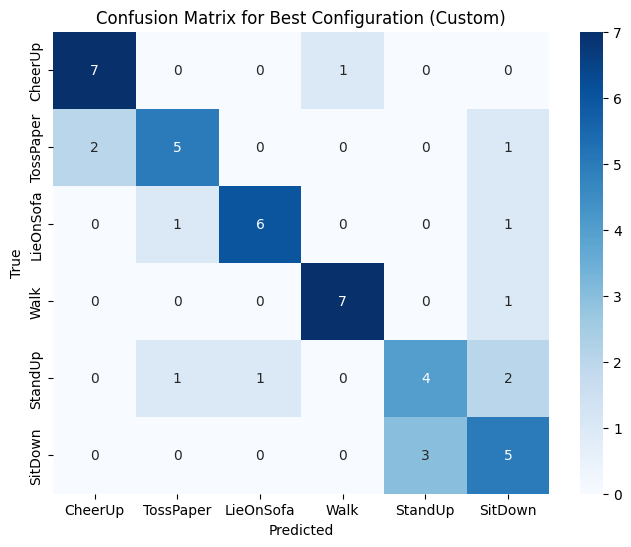

In [17]:
best_cm = confusion_matrix(test_targets, best_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, cmap="Blues", xticklabels=action_labels, yticklabels=action_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Configuration (Custom)')
plt.show()

---

# Results Summary:

### RAD Featurization
- Best Configuration:
    - C = 1
    - gamma = 1
    - kernel = rbf
- Best Accuracy: 0.625
- Best Precision: 0.630

### Custom Featurization
- Best Configuration:
    - C = 0.001
    - gamma = 0.5
    - kernel = rbf
- Best Accuracy: 0.708
- Best Precision: 0.716